In [1]:
from ODE_sim_tools import *
from KRAS_Variant import *
from pKRAS_model import *
import numpy as np
import matplotlib.pyplot as plt
params = {'mathtext.default': 'regular' }          
plt.rcParams.update(params)
from labellines import labelLine, labelLines
import time

/home/ca784/.conda/envs/bionetgen/lib/python3.11/site-packages/tqdm/auto.py:21: TqdmWarning: IProgress not found. Please update jupyter and ipywidgets. See https://ipywidgets.readthedocs.io/en/stable/user_install.html
  from .autonotebook import tqdm as notebook_tqdm


In [2]:
pRAS = KRAS_Variant('pRAS',[1/3,1,1,1,1,1/3,1,1/8,1,1,1,2,1,1,1,1,1,1])

In [3]:
x = KRAS_Variant("")

In [9]:
x.KmD

1.544e-06

In [4]:
get_param_opts = {'mutant':x,'Total RAS':4e-7,'Effector':4e-7,'GAP':6e-11,'GTP':180e-6,'GDP':18e-6,'GEF':(2e-10),'fract_mut':0,'Src':5.2e-10,'SHP2':9.7e-9}
sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)

In [10]:
pRAS_model(0,[1,1,1,1,1,0,0,0,0,0],sim.k)

2.600593381731714e-10 3.2399999970192e-10 0.00035 -41.39989 -395.99975 44999996.4 0.00035


[41.40059000001194,
 -44999600.4006,
 -437.39964,
 -44999996.39965,
 44999996.39965,
 0.0,
 5.199997920000832e-11,
 0.0,
 0.0]

Basic Model Simulation

In [11]:
fract_pRAS = 1e-5
get_param_opts = {'mutant':pRAS,'Total RAS':4e-7,'Effector':4e-7,'GAP':6e-11,'GTP':180e-6,'GDP':18e-6,'GEF':(2e-10),'fract_mut':fract_pRAS,'Src':5.2e-10,'SHP2':9.7e-9}
sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)

1.604922222222222e-10 0.0 0.0 4.399956e-11 0.0 0.0 0.0
1.6039472576320402e-10 4.811780461068843e-11 5.6161422235916995e-14 -1.7772526849886659e-09 -1.7420418413078193e-08 2.8883017149900167e-09 0.0
1.5809683623785357e-10 3.048412901372457e-10 5.1245275812950646e-12 7.946741706826277e-07 7.600812241311494e-06 2.5124861231383134e-07 1.010710238254881e-12
1.6046784808859054e-10 1.3537287674733063e-11 1.4040355558979249e-14 -4.113135012471665e-10 -4.355104603269548e-09 7.220754287475042e-10 0.0
1.603229586308807e-10 1.6415370854415866e-10 3.3068133030000273e-13 4.936690050068631e-08 4.717844365352947e-07 1.6349052622430035e-08 6.316938989093007e-14
1.604861286876345e-10 3.4938050271397834e-12 3.510088889744812e-15 -6.982870531179162e-11 -1.088776150817387e-09 1.8051885718687604e-10 0.0
1.6047707030565882e-10 2.1860747121534107e-11 2.3297755330868846e-14 3.0413096705616e-09 2.866994516863253e-08 1.15752759147024e-09 3.948086868183129e-15
1.6049069883850154e-10 8.805729093385015e-13 8.775222

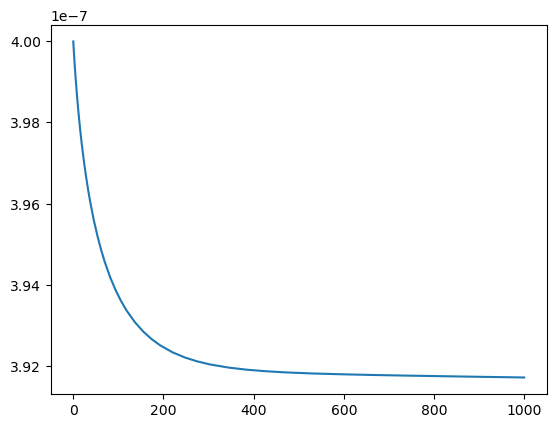

In [14]:
t,y = sim.integrate_model(1e3,sim.y0,sim.k)
plt.plot(t,y[0,:])

In [4]:
res = sim.integrate_model_to_ss(tol=1e-17)

1xGEF, Varying Abudences of Src and SHP2

Running simulations...: 100%|██████████| 2500/2500 [00:28<00:00, 87.66it/s] 


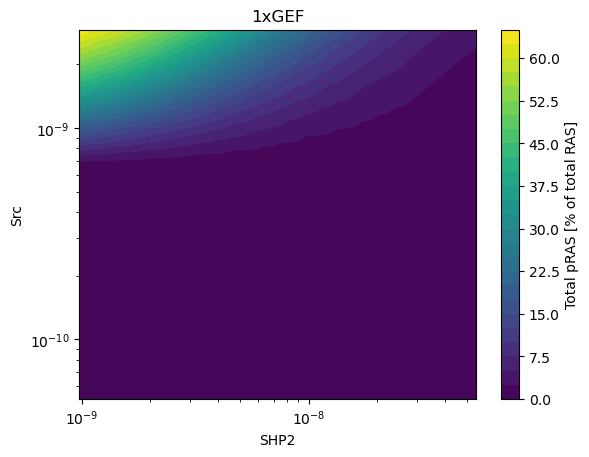

Running simulations...: 100%|██████████| 2500/2500 [00:28<00:00, 88.56it/s] 


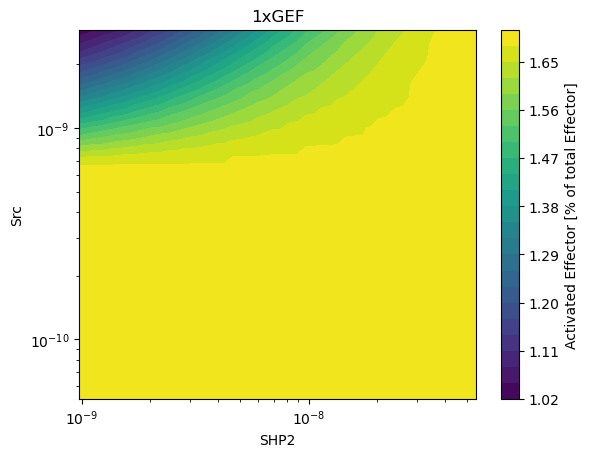

Running simulations...: 100%|██████████| 2500/2500 [00:27<00:00, 89.56it/s] 


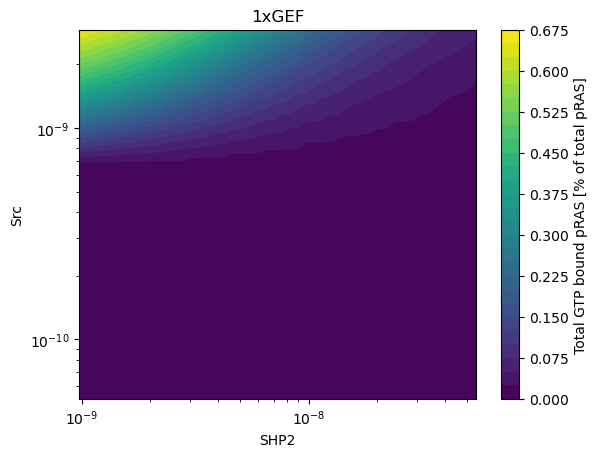

Running simulations...: 100%|██████████| 2500/2500 [00:28<00:00, 88.24it/s] 


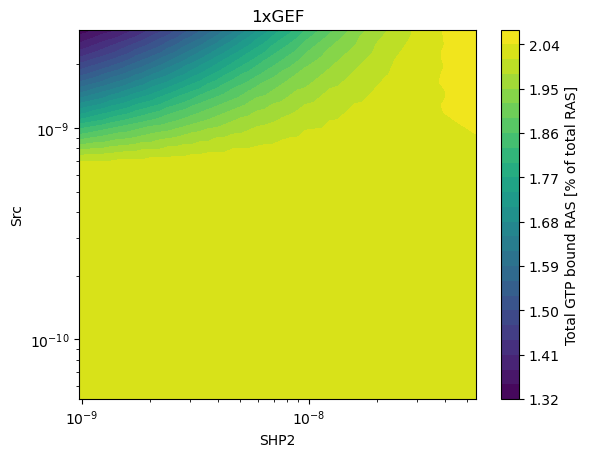

In [4]:
fract_pRAS = 1e-5

Src = {'name':'Src','type':'iv','range':[-1,0.75],'range_type':'log-uniform'}
SHP2 = {'name':'SHP2','type':'iv','range':[-1,0.75],'range_type':'log-uniform'}

GEF_mult = 1
get_param_opts = {'mutant':pRAS,'Total RAS':4e-7,'Effector':4e-7,'GAP':6e-11,'GTP':180e-6,'GDP':18e-6,'GEF':(2e-10)*GEF_mult,'fract_mut':fract_pRAS,'Src':(5.2e-10),'SHP2':(9.7e-9)}

sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
sim.response_surface_2D(Src,SHP2,out_option='per_pRAS_Tot')
plt.colorbar(label=r"Total pRAS [% of total RAS]")
plt.title(f"{GEF_mult}xGEF")
plt.show()

sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
sim.response_surface_2D(Src,SHP2,out_option='per_RAS_GTP_Eff')
plt.colorbar(label=r"Activated Effector [% of total Effector]")
plt.title(f"{GEF_mult}xGEF")
plt.show()

sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
sim.response_surface_2D(Src,SHP2,out_option='per_pRAS_GTP_Tot')
plt.colorbar(label=r"Total GTP bound pRAS [% of total pRAS]")
plt.title(f"{GEF_mult}xGEF")
plt.show()

sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
sim.response_surface_2D(Src,SHP2,out_option='per_RAS_GTP_Tot')
plt.colorbar(label=r"Total GTP bound RAS [% of total RAS]")
plt.title(f"{GEF_mult}xGEF")
plt.show()

2xGEF, Varying Abudences of Src and SHP2

Running simulations...: 100%|██████████| 2500/2500 [00:31<00:00, 80.17it/s] 


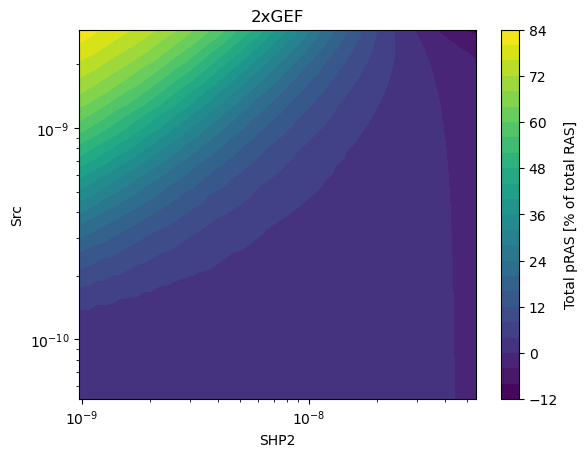

Running simulations...: 100%|██████████| 2500/2500 [00:31<00:00, 80.04it/s] 


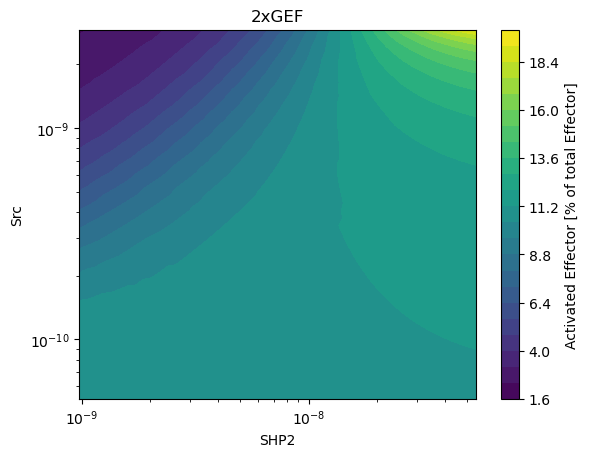

Running simulations...: 100%|██████████| 2500/2500 [00:30<00:00, 81.42it/s] 


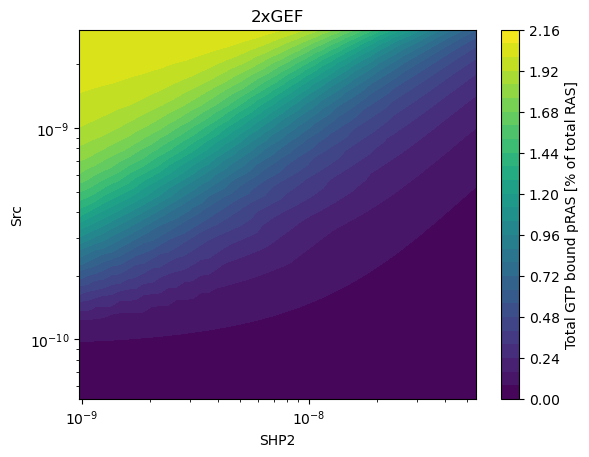

Running simulations...: 100%|██████████| 2500/2500 [00:30<00:00, 81.20it/s] 


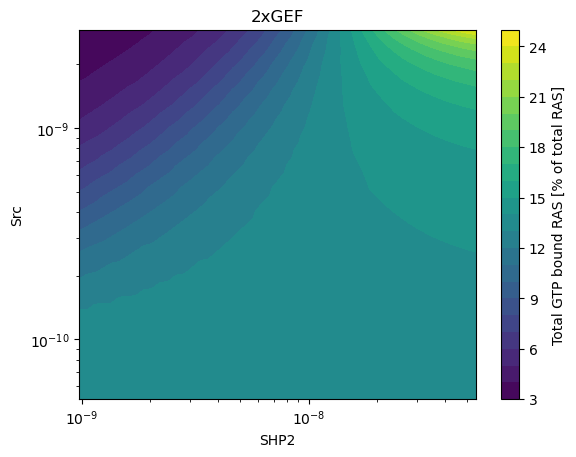

In [4]:
fract_pRAS = 1e-5

Src = {'name':'Src','type':'iv','range':[-1,0.75],'range_type':'log-uniform'}
SHP2 = {'name':'SHP2','type':'iv','range':[-1,0.75],'range_type':'log-uniform'}

GEF_mult = 2
get_param_opts = {'mutant':pRAS,'Total RAS':4e-7,'Effector':4e-7,'GAP':6e-11,'GTP':180e-6,'GDP':18e-6,'GEF':(2e-10)*GEF_mult,'fract_mut':fract_pRAS,'Src':(5.2e-10),'SHP2':(9.7e-9)}

sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
sim.response_surface_2D(Src,SHP2,out_option='per_pRAS_Tot')
plt.colorbar(label=r"Total pRAS [% of total RAS]")
plt.title(f"{GEF_mult}xGEF")
plt.show()

sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
sim.response_surface_2D(Src,SHP2,out_option='per_RAS_GTP_Eff')
plt.colorbar(label=r"Activated Effector [% of total Effector]")
plt.title(f"{GEF_mult}xGEF")
plt.show()

sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
sim.response_surface_2D(Src,SHP2,out_option='per_pRAS_GTP_Tot')
plt.colorbar(label=r"Total GTP bound pRAS [% of total RAS]")
plt.title(f"{GEF_mult}xGEF")
plt.show()

sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
sim.response_surface_2D(Src,SHP2,out_option='per_RAS_GTP_Tot')
plt.colorbar(label=r"Total GTP bound RAS [% of total RAS]")
plt.title(f"{GEF_mult}xGEF")
plt.show()

1xGEF, Varying Km of Src and SHP2

Running simulations...: 100%|██████████| 2500/2500 [00:26<00:00, 93.98it/s] 


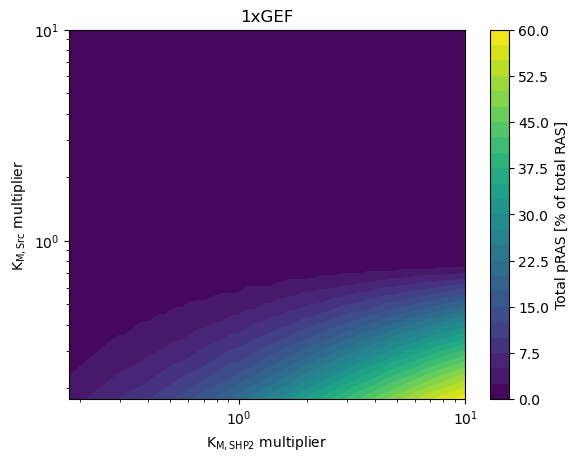

Running simulations...: 100%|██████████| 2500/2500 [00:26<00:00, 94.52it/s] 


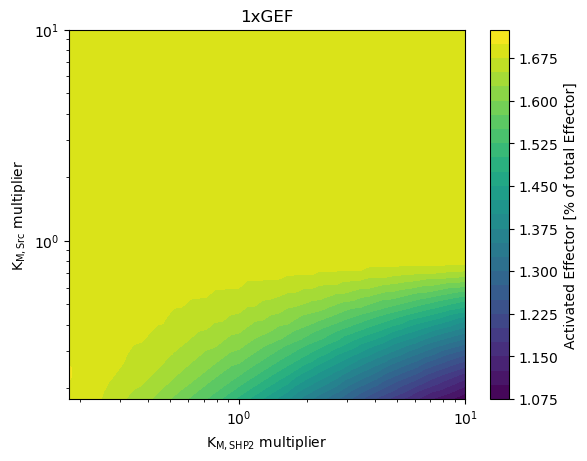

Running simulations...: 100%|██████████| 2500/2500 [00:28<00:00, 88.97it/s] 


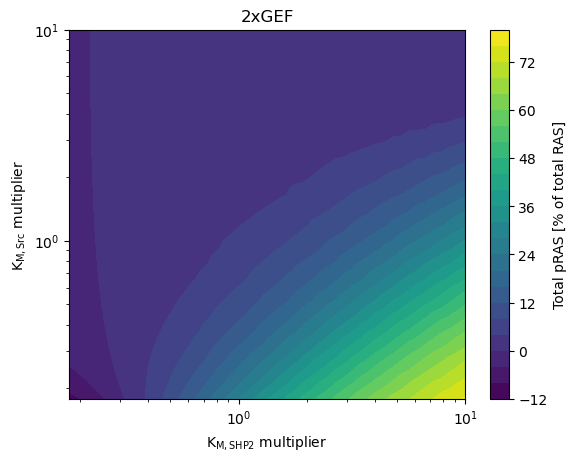

Running simulations...: 100%|██████████| 2500/2500 [00:28<00:00, 88.46it/s] 


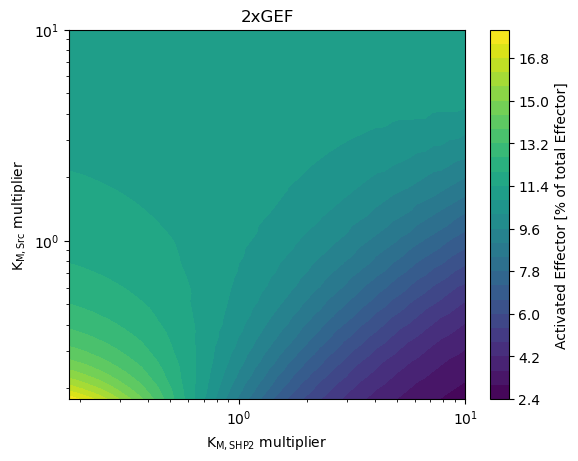

In [4]:
fract_pRAS = 1e-5

KmSrc = {'name':'$K_{M,Src}$','type':'kinetic','ID':33,'range':[-0.75,1],'range_type':'log-uniform'}
KmSHP2 = {'name':'$K_{M,SHP2}$','type':'kinetic','ID':35,'range':[-0.75,1],'range_type':'log-uniform'}

GEF_mult = 1
get_param_opts = {'mutant':pRAS,'Total RAS':4e-7,'Effector':4e-7,'GAP':6e-11,'GTP':180e-6,'GDP':18e-6,'GEF':(2e-10)*GEF_mult,'fract_mut':fract_pRAS,'Src':(5.2e-10),'SHP2':(9.7e-9)}

sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
sim.response_surface_2D(KmSrc,KmSHP2,out_option='per_pRAS_Tot')
plt.colorbar(label=r"Total pRAS [% of total RAS]")
plt.title(f"{GEF_mult}xGEF")
plt.show()

sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
sim.response_surface_2D(KmSrc,KmSHP2,out_option='per_RAS_GTP_Eff')
plt.colorbar(label=r"Activated Effector [% of total Effector]")
plt.title(f"{GEF_mult}xGEF")
plt.show()

GEF_mult = 2
get_param_opts = {'mutant':pRAS,'Total RAS':4e-7,'Effector':4e-7,'GAP':6e-11,'GTP':180e-6,'GDP':18e-6,'GEF':(2e-10)*GEF_mult,'fract_mut':fract_pRAS,'Src':(5.2e-10),'SHP2':(9.7e-9)}

sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
sim.response_surface_2D(KmSrc,KmSHP2,out_option='per_pRAS_Tot')
plt.colorbar(label=r"Total pRAS [% of total RAS]")
plt.title(f"{GEF_mult}xGEF")
plt.show()

sim = ODE_Simulation(pRAS_model,get_params_pRAS,get_param_opts)
sim.response_surface_2D(KmSrc,KmSHP2,out_option='per_RAS_GTP_Eff')
plt.colorbar(label=r"Activated Effector [% of total Effector]")
plt.title(f"{GEF_mult}xGEF")
plt.show()